# Creating Effective Data Visualizations  (in Python)
### Case Western Reserve University Journal of Economics


For this module the python library matplotlib (pyplots) will be used. If you are using a personal computer installation of Python please use the following command in your terminal to download matplotlib if you have not already:  `pip install matplotlib`

In order to load our datasets that we have previously cleaned we will again use the pandas library. If you have not done any data cleaning and are using a personal computer installation of python use the following command in your terminal to download pandas: `pip install pandas`

If you are using Google CoLab there is no need run this command Google will load it for you. 



**Importing matplotlib and pandas**

The following lines are needed to load the matplotlib and pandas modules, we are using pyplots which is generally abreviated as `plt`. Pandas is generally abreviated to `pd`

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

### Loading Datasets

In python we will load our datasets with different commands based on the format of our dataset.

**CSV**  

This is the most common format of dataset we will come across. CSV stands for comma-separated values. In pandas we can use the following command to load the dataset:  
`var_name = pd.load_csv('filepath')`  
This will set the var_name to the data, and will load the data from the file path (this can be an absolute or relative path (relative means from the folder your file is in, absolute would be from the root directory of your operating system))

**XLSX (Microsoft Excel)**  

This is another common format of dataset. In pandas we can use the following command to load the dataset:
`var_name = pd.read_excel('filepath')`  
There are lots of powerful optional arguments that you can refer to the documentation on. The only one that could be generally useful is the sheet_name parameter:

Unlike R, Python is a 0 index language, so it is defaulted at 0 (so the first sheet). If you need to pull data from a different sheet the simplest way to do this is to specify the sheet number or name in the sheet_name parameter. 

Imagine I have a excel sheet with 2 sheets, original_data, and corrected_data. If I use the command with just the filepath I will pull the data from the original_data sheet. If I want the corrected_data, I have 2 options: 

- Use the index:

`var_name = pd.read_excel('filepath', sheet_name=1)`

- Use the sheet name:

`var_name = pd.read_excel('filepath', sheet_name='corrected_data')`

*Note that for excel files you must have the `openpyxl` library installed as well*

**TXT**

These are much less common but some old census files I have seen usep pipe-delimited text files. In this case you will have to use a different command and declare the delimiter if it is anything but tab delimited. 

`var_name = pd.read_table('filepath', sep = '|')`

^ This example is for pipe-delimited text file parsing. 

The data would look something like this:

> name | age | income   
> Mark | 25 | 0


For any other formats of data (JSON, XML, SHP, etc) reach out to your project leads or me for help (often ChatGPT can help)

In [140]:
""" For this example, we will be sourcing our data from the MTA Daily Ridership Data.
        In this cell block we will read in our data and look at the columns that we have
        as well as what our data looks like.

    As we can see, we have a timeseries of data that is indexed daily,
        our columns are split by method of transit and for each method of transit we have
        the number of riders for that day as well as the % of ridership compared a comparable pre-pandemic day
"""
data = pd.read_csv('MTA_Daily_Ridership_Data__Beginning_2020_20240629.csv')
print(data.columns)
data.head()


Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')


,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,0.97,984908,0.99,NaN,NaN,55826,0.59,19922,1.13,786961,0.98,1636.0,0.52
1,03/02/2020,5329915,0.96,2209066,0.99,321569.0,1.03,180702,0.66,30338,1.02,874620,0.95,17140.0,1.07
2,03/03/2020,5481103,0.98,2228608,0.99,319727.0,1.02,190648,0.69,32767,1.10,882175,0.96,17453.0,1.09
3,03/04/2020,5498809,0.99,2177165,0.97,311662.0,0.99,192689,0.70,34297,1.15,905558,0.98,17136.0,1.07
4,03/05/2020,5496453,0.99,2244515,1.00,307597.0,0.98,194387,0.70,33209,1.12,929298,1.01,17203.0,1.08


### Effective Line Graphs

Effective line graphs avoid using too many lines, and too many colors. It is key to keep graphs simple, our line graphs are to help the reader quickly understand our argument. 

In this portion we will learn how to use the python library `matplotlib` to do create a line graph. 

In `matplotlib` we can set our color using the `color` parameter. We can either supply a hexcode or a string like 'blue'. We should have Journal theme hexcodes available by the time we start publishing. In `matplotlib` we add lines to a plot using plt.plot().  

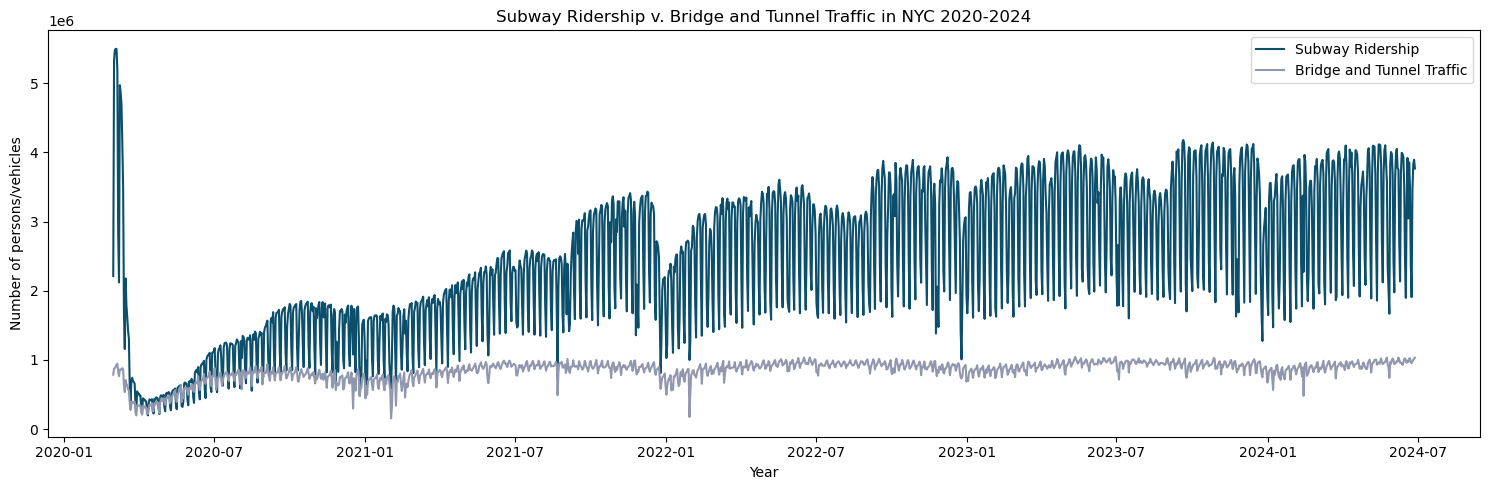

In [141]:
## lets do subway vs bridges and tunnels usage over time 
from datetime import datetime
## make our X-axis time, we need to convert to a datetime
data["Date"] = pd.to_datetime(data['Date'], format="%m/%d/%Y")

## First create a figure
plt.figure(figsize=(15,5))
## now we add our lines using `plt.plot()`
plt.plot(data["Date"], data["Subways: Total Estimated Ridership"], label="Subway Ridership", color="#0B4F6C")
plt.plot(data["Date"], data["Bridges and Tunnels: Total Traffic"], label="Bridge and Tunnel Traffic", color ="#9197AE")
plt.title("Subway Ridership v. Bridge and Tunnel Traffic in NYC 2020-2024")
plt.xlabel("Year")
plt.ylabel("Number of persons/vehicles")
plt.legend()
# plt.yscale("log")
plt.tight_layout()
plt.show()


This graph above is ok, but its messy, the data is too frequent for this long period of time, lets try and graph by week instead. 

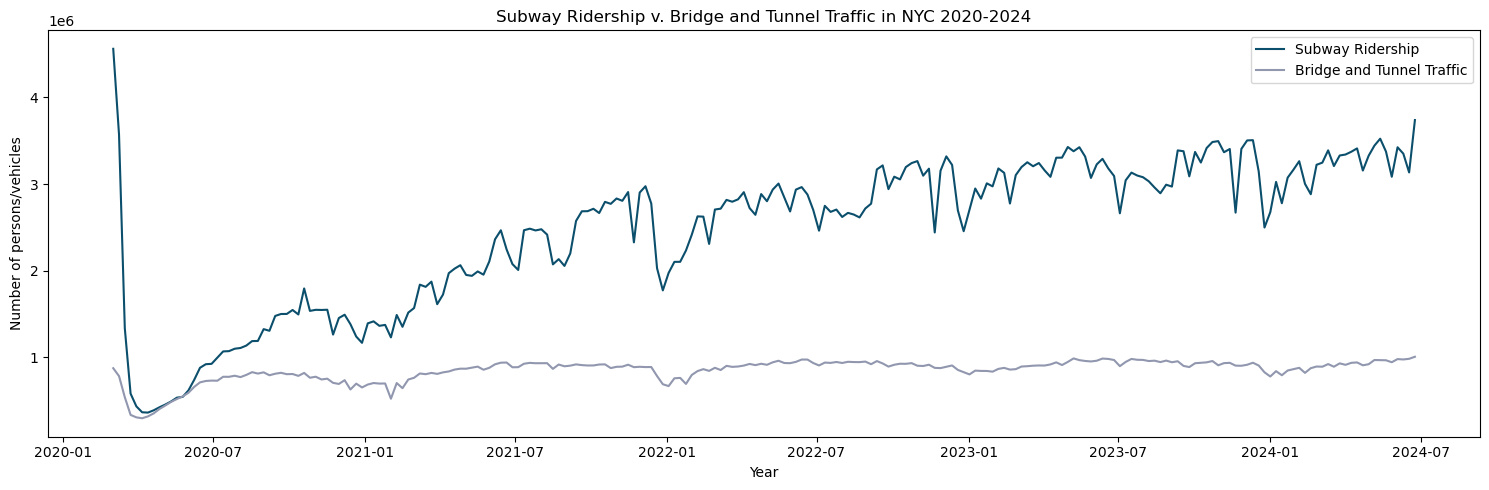

In [142]:
## lets change our data to be weekly
daily_data = data 
data.dropna(inplace=True)
data["Week"] = data["Date"].dt.isocalendar().week
data["Year"] = data["Date"].dt.isocalendar().year
data["Week"] = data["Week"].astype(str)
data["Year"] = data["Year"].astype(str)
data["Week"] = data["Year"] + "-" + data["Week"]
data["Week"] = pd.to_datetime(data["Week"] + "-1", format="%G-%V-%u")
data.drop(columns=["Year","Date"], inplace=True)
data = data.groupby("Week").mean().reset_index()
## First create a figure
plt.figure(figsize=(15,5))
## now we add our lines using `plt.plot()`
plt.plot(data["Week"], data["Subways: Total Estimated Ridership"], label="Subway Ridership", color="#0B4F6C")
plt.plot(data["Week"], data["Bridges and Tunnels: Total Traffic"], label="Bridge and Tunnel Traffic", color ="#9197AE")
plt.title("Subway Ridership v. Bridge and Tunnel Traffic in NYC 2020-2024")
plt.xlabel("Year")
plt.ylabel("Number of persons/vehicles")
plt.legend()
#plt.yscale("log")
plt.tight_layout()
plt.show()



### Effective Scatter Plots

Scatter plots are great at showing the relationships between two variables. We can also hightlight certain datapoints that we want to hightlight, maybe it corresponds to a particular area of interest (like below highlighting during Covid) Or maybe we are identifying interesting outliers. The goal of a scatter plot is to show some sort of trend in the data between two variables. To make scatter plots we simply use `plt.scatter(x, y)` `label` and `color` are still optional parameters that we can set.

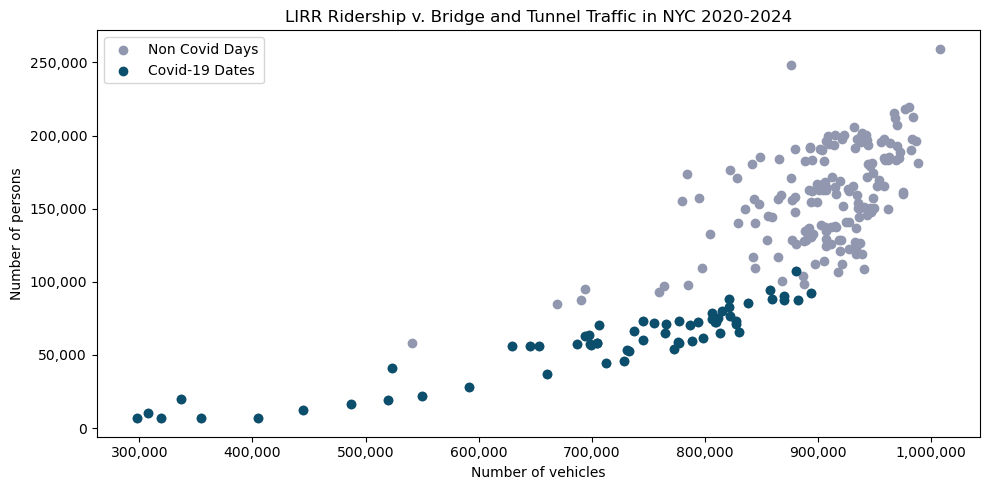

In [143]:
import matplotlib.ticker as ticker
## Highlighting only the data during Covid
highlight = data[(data["Week"] > datetime(year=2020, month=3, day=19)) & 
                 (data["Week"] < datetime(year=2021, month=6, day=1))]

plt.figure(figsize=(10,5))
## now we add our points using `plt.scatter()`
plt.scatter(data["Bridges and Tunnels: Total Traffic"], data["LIRR: Total Estimated Ridership"], label="Non Covid Days", color="#9197AE")
## highlight the data during Covid
plt.scatter(highlight["Bridges and Tunnels: Total Traffic"], highlight["LIRR: Total Estimated Ridership"], label="Covid-19 Dates", color="#0B4F6C")

plt.title("LIRR Ridership v. Bridge and Tunnel Traffic in NYC 2020-2024")
plt.xlabel("Number of vehicles")
plt.ylabel("Number of persons")
plt.legend()
## no scientific notation
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()


### Effective Bar Graphs

Bar charts are excellent for comparing quantities across different categories. They provide a clear visual representation of data, making it easy to see which categories are larger or smaller. You can also highlight specific bars to draw attention to particular data points, such as those that are above a certain threshold or represent significant changes.

To create a bar chart in Matplotlib, you can use `plt.bar(x, height)`, where x represents the categories and height represents the values. You can customize the appearance using optional parameters like `color` and `label`. Or you can use the data and say `data.plot(x=x, kind='bar')`

/var/folders/12/cj06bs3d3w32s5gsb5vnl_ww0000gn/T/ipykernel_30063/687641967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['year'] = year_data["Week"].dt.year
/var/folders/12/cj06bs3d3w32s5gsb5vnl_ww0000gn/T/ipykernel_30063/687641967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data.drop('Week', axis=1, inplace=True)


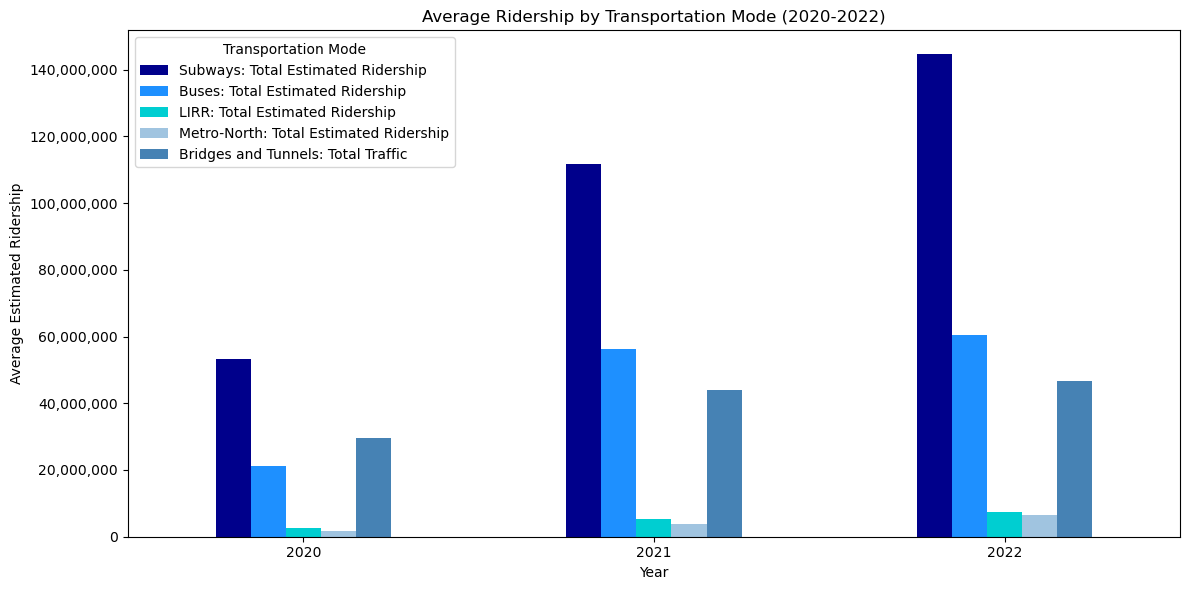

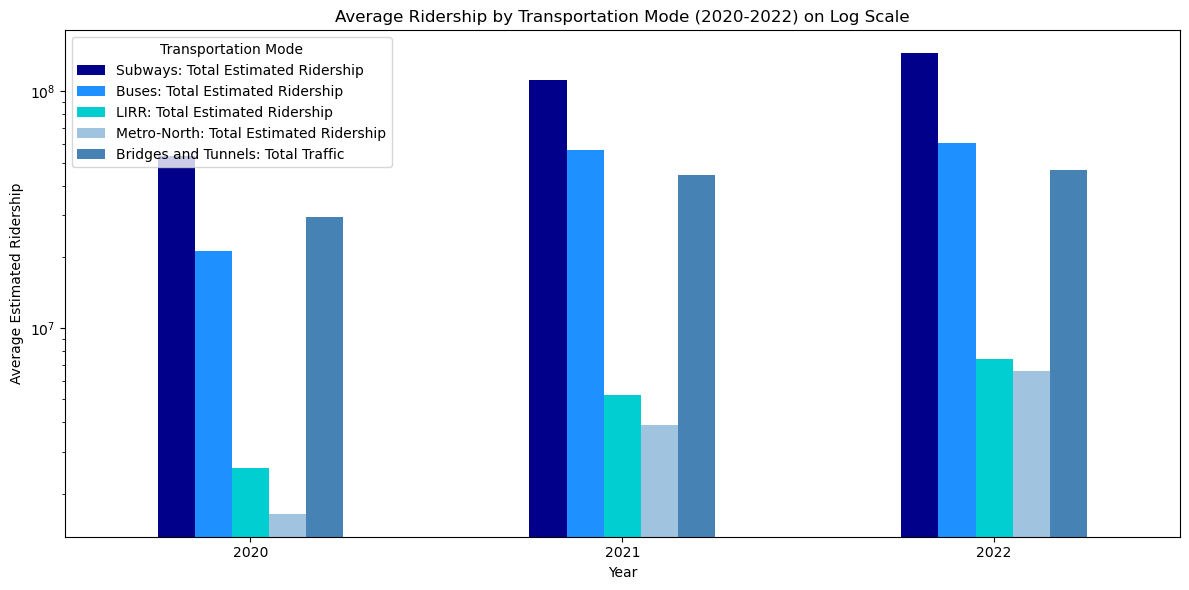

In [144]:
"""Dark Blue: #00008B
Dodger Blue: #1E90FF
Pale Turquoise 3: #00CED1
Light Steel Blue 3: #A0C4E0
Sky Blue 4: #4682B4
Gray 49: #7B7B7B"""
colors = ["#00008B", "#1E90FF", "#00CED1", "#A0C4E0", "#4682B4"]
year_data = data[data["Week"].dt.year.isin([2020, 2021, 2022])]
year_data['year'] = year_data["Week"].dt.year
year_data.drop('Week', axis=1, inplace=True)
year_data = year_data.groupby(['year']).agg({
    'Subways: Total Estimated Ridership': 'sum',
    'Buses: Total Estimated Ridership': 'sum',
    'LIRR: Total Estimated Ridership': 'sum',
    'Metro-North: Total Estimated Ridership': 'sum',
    'Bridges and Tunnels: Total Traffic': 'sum'
}).reset_index()



year_data.plot(x='year', kind='bar', figsize=(12, 6), color=colors)
plt.title('Average Ridership by Transportation Mode (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average Estimated Ridership')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)
plt.legend(title='Transportation Mode')
plt.tight_layout()
plt.show()

### Log Scale
year_data.plot(x='year', kind='bar', figsize=(12, 6), color=colors)
plt.title('Average Ridership by Transportation Mode (2020-2022) on Log Scale')
plt.xlabel('Year')
plt.ylabel('Average Estimated Ridership')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)
plt.yscale("log")
plt.legend(title='Transportation Mode')
plt.tight_layout()
plt.show()

### Effective Histograms

Histograms are useful for displaying the distribution of a dataset, showing how frequently different ranges of values occur. They help identify patterns, such as skewness, modality, and the presence of outliers. Highlighting specific bins can emphasize certain ranges of interest, like values that fall within a target range or outliers.

To create a histogram in Matplotlib, you can use `plt.hist(data, bins)`, where data is the dataset and bins defines how many intervals you want to divide your data into.
For example, below we see a bimodal distribution of sorts on Subway Ridership

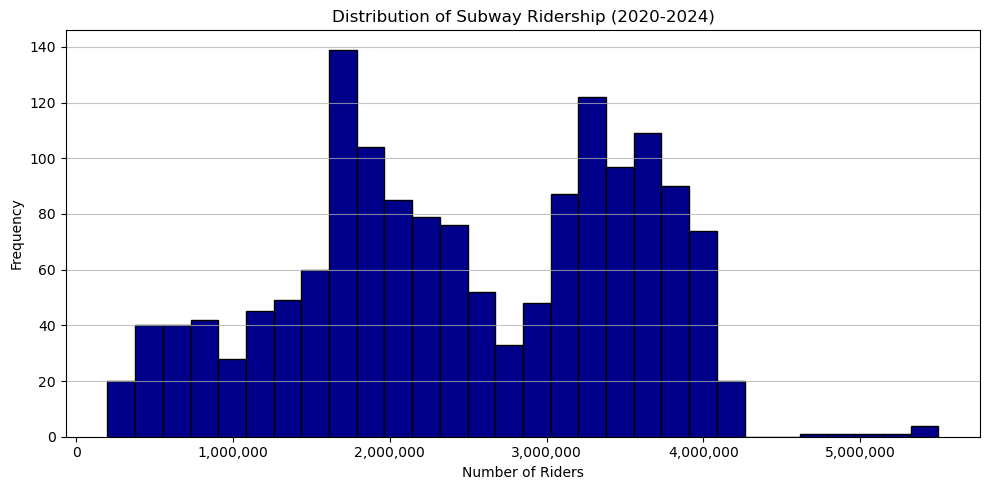

In [147]:
plt.figure(figsize=(10, 5))
plt.hist(daily_data['Subways: Total Estimated Ridership'], bins=30, color='#00008B', edgecolor='black')
plt.title("Distribution of Daily Subway Ridership (2020-2024)")
plt.xlabel("Number of Riders")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()